In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Tải dữ liệu Wine
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
# Chia tập dữ liệu (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Khởi tạo và huấn luyện mô hình KNN với k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Dự đoán
y_pred = knn.predict(X_test)

In [5]:
# In kết quả với k=5
print("Kết quả với k=5:")
print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Độ nhạy trung bình (Recall): {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"Độ chính xác trung bình (Precision): {precision_score(y_test, y_pred, average='macro'):.4f}")

Kết quả với k=5:
Độ chính xác (Accuracy): 0.7407
Độ nhạy trung bình (Recall): 0.7268
Độ chính xác trung bình (Precision): 0.7260


In [6]:
print("\nBáo cáo chi tiết:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Báo cáo chi tiết:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [7]:
# Thử nghiệm với các giá trị k khác nhau
k_values = [1, 3, 5, 7, 9]
accuracies = []
recalls = []
precisions = []

In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    precisions.append(precision_score(y_test, y_pred, average='macro'))

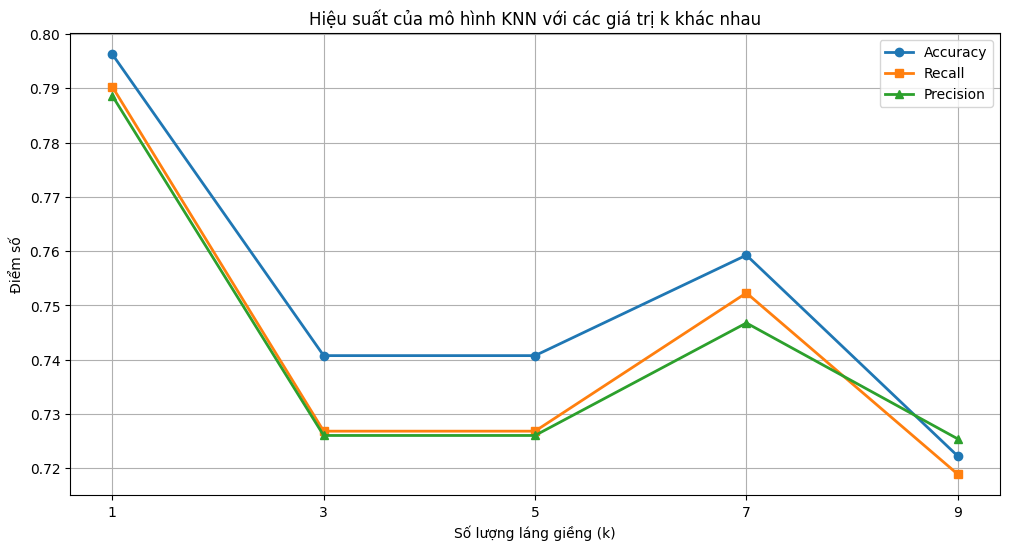

In [12]:
# Vẽ đồ thị
plt.figure(figsize=(12, 6))

plt.plot(k_values, accuracies, marker='o', label='Accuracy', linewidth=2)
plt.plot(k_values, recalls, marker='s', label='Recall', linewidth=2)
plt.plot(k_values, precisions, marker='^', label='Precision', linewidth=2)

plt.xlabel('Số lượng láng giềng (k)')
plt.ylabel('Điểm số')
plt.title('Hiệu suất của mô hình KNN với các giá trị k khác nhau')
plt.grid(True)
plt.legend()
plt.xticks(k_values)
plt.show()

In [13]:
# In bảng kết quả chi tiết
print("\nBảng kết quả chi tiết cho các giá trị k:")
print("\nk\tAccuracy\tRecall\t\tPrecision")
print("-" * 50)
for k, acc, rec, prec in zip(k_values, accuracies, recalls, precisions):
    print(f"{k}\t{acc:.4f}\t\t{rec:.4f}\t\t{prec:.4f}")


Bảng kết quả chi tiết cho các giá trị k:

k	Accuracy	Recall		Precision
--------------------------------------------------
1	0.7963		0.7903		0.7886
3	0.7407		0.7268		0.7260
5	0.7407		0.7268		0.7260
7	0.7593		0.7523		0.7468
9	0.7222		0.7189		0.7254
